### SparklyRGT Template: Latin Square Analysis

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_3) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [16]:
file_names = [''] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,02/13/20,15:35:41,9,1,1,0,NaN,55,1.1,...,0,0,0,1,5,0,0,0,0,0
1,rGT_A-cue,02/13/20,15:35:41,9,1,1,0,NaN,55,1.1,...,0,0,0,1,4,0,0,0,0,0
2,rGT_A-cue,02/13/20,15:35:41,9,1,1,0,NaN,55,1.0,...,2,1,30,0,0,0,0,0,0,0
3,rGT_A-cue,02/13/20,15:35:41,9,1,1,0,NaN,55,2.1,...,0,0,0,1,5,0,0,0,0,0
4,rGT_A-cue,02/13/20,15:35:41,9,1,1,0,NaN,55,2.1,...,0,0,0,1,5,0,0,0,0,0


***
# 3A) Latin Square Analysis

**This section assumes you have assigned dosing information to the 'Group' variable in MEDPC**
* in this example: vehicle = 1 in Group column, low dose = 2, mid dose = 3, high dose = 4


In [17]:
#for plotting: 
title = '5-HT2c Antagonist' 

#lowest group number
startdose =  1
#highest group number
enddose = 4

## Data cleaning

### Check the Group numbers for each rat


In [18]:
rgt.check_groups(df)

Subject  Group
1        1         50.1
         2         79.1
         3         40.0
         4        111.0
2        1         77.0
         2         74.0
         3         70.0
         4         94.0
3        1         50.1
         2         38.1
         3         45.0
         4         40.0
4        1         86.0
         2         82.0
         3         95.0
         4         79.0
5        0         87.0
         1         79.1
         2         79.0
         4        128.0
6        1        125.1
         2         98.0
         3        105.0
         4        121.0
7        1         76.1
         2         80.1
         3         68.0
         4         57.1
8        1         75.0
         2         58.0
         3         57.1
         4         66.0
9        1         65.1
         2         69.0
         3         55.0
         4         48.0
11       1         56.1
         2         58.0
         3         61.0
         4         55.0
12       1         63.0
 

### Drop subjects & edit Group numbers


In [7]:
df2 = rgt.edit_groups(df, orig_group = [0], new_group = [3], subs = [5])

df2 = rgt.drop_subjects(df, subs = [7])


### Check that you edited the Group number/dropped subjects as desired

In [8]:
rgt.check_groups(df2)

Subject  Group
1        1         50.1
         2         79.1
         3         40.0
         4        111.0
2        1         77.0
         2         74.0
         3         70.0
         4         94.0
3        1         50.1
         2         38.1
         3         45.0
         4         40.0
4        1         86.0
         2         82.0
         3         95.0
         4         79.0
5        1         79.1
         2         79.0
         3         87.0
         4        128.0
6        1        125.1
         2         98.0
         3        105.0
         4        121.0
8        1         75.0
         2         58.0
         3         57.1
         4         66.0
9        1         65.1
         2         69.0
         3         55.0
         4         48.0
11       1         56.1
         2         58.0
         3         61.0
         4         55.0
12       1         63.0
         3         80.0
         4         95.1
13       1         55.0
         2         63.1
 

## Data processing

### Calculate variables for each rat at each dose


In [9]:
df_sum = rgt.get_summary_data(df2, mode = 'Group')
df_sum

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit3,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4
1,0,34,64,2,0,57.1429,35.0649,7.79221,5,40,...,0,2,50.1,79.1,40.0,111.0,54.954955,32.478632,70.588235,14.615385
2,3.8961,59.7403,7.79221,28.5714,12.3288,61.6438,6.84932,19.1781,8.57143,45.7143,...,0,1,77.0,74.0,70.0,94.0,23.000000,28.846154,31.372549,17.543860
3,0,18,78,4,0,13.8889,80.5556,5.55556,2.22222,20,...,0,0,50.1,38.1,45.0,40.0,57.264957,70.400000,64.000000,56.989247
4,1.23457,67.9012,0,30.8642,1.21951,65.8537,0,32.9268,0,77.6596,...,1,2,86.0,82.0,95.0,79.0,24.561404,21.904762,16.666667,15.957447
5,5.12821,35.8974,55.1282,3.84615,3.84615,61.5385,28.2051,6.41026,17.4419,40.6977,...,1,0,79.1,79.0,87.0,128.0,33.898305,41.044776,21.621622,19.496855
6,1.62602,85.3659,0,13.0081,2.06186,72.1649,0,25.7732,1.90476,69.5238,...,0,0,125.1,98.0,105.0,121.0,13.888889,15.517241,10.256410,1.626016
8,4,44,0,52,6.89655,31.0345,5.17241,56.8966,0,42.8571,...,0,0,75.0,58.0,57.1,66.0,18.478261,42.574257,47.169811,41.071429
9,0,1.5625,98.4375,0,0,14.9254,82.0896,2.98507,1.85185,11.1111,...,1,2,65.1,69.0,55.0,48.0,26.436782,24.175824,46.078431,54.716981
11,3.63636,1.81818,94.5455,0,1.72414,3.44828,93.1034,1.72414,1.63934,4.91803,...,0,0,56.1,58.0,61.0,55.0,35.294118,31.764706,11.594203,29.487179
12,1.75439,66.6667,12.2807,19.2982,NaN,NaN,NaN,NaN,6.25,68.75,...,0,0,63.0,NaN,80.0,95.1,18.181818,NaN,35.483871,20.833333


### Impute missing data


In [10]:
df_sum = rgt.impute_missing_data(df_sum, session = 2, subject = 12, choice = 'all', vars = 'all')
df_sum

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit3,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4
1,0,34,64,2,0,57.1429,35.0649,7.79221,5,40,...,0,2,50.1,79.1,40.0,111.0,54.954955,32.478632,70.588235,14.615385
2,3.8961,59.7403,7.79221,28.5714,12.3288,61.6438,6.84932,19.1781,8.57143,45.7143,...,0,1,77.0,74.0,70.0,94.0,23.000000,28.846154,31.372549,17.543860
3,0,18,78,4,0,13.8889,80.5556,5.55556,2.22222,20,...,0,0,50.1,38.1,45.0,40.0,57.264957,70.400000,64.000000,56.989247
4,1.23457,67.9012,0,30.8642,1.21951,65.8537,0,32.9268,0,77.6596,...,1,2,86.0,82.0,95.0,79.0,24.561404,21.904762,16.666667,15.957447
5,5.12821,35.8974,55.1282,3.84615,3.84615,61.5385,28.2051,6.41026,17.4419,40.6977,...,1,0,79.1,79.0,87.0,128.0,33.898305,41.044776,21.621622,19.496855
6,1.62602,85.3659,0,13.0081,2.06186,72.1649,0,25.7732,1.90476,69.5238,...,0,0,125.1,98.0,105.0,121.0,13.888889,15.517241,10.256410,1.626016
8,4,44,0,52,6.89655,31.0345,5.17241,56.8966,0,42.8571,...,0,0,75.0,58.0,57.1,66.0,18.478261,42.574257,47.169811,41.071429
9,0,1.5625,98.4375,0,0,14.9254,82.0896,2.98507,1.85185,11.1111,...,1,2,65.1,69.0,55.0,48.0,26.436782,24.175824,46.078431,54.716981
11,3.63636,1.81818,94.5455,0,1.72414,3.44828,93.1034,1.72414,1.63934,4.91803,...,0,0,56.1,58.0,61.0,55.0,35.294118,31.764706,11.594203,29.487179
12,1.75439,66.6667,12.2807,19.2982,4.00219,67.7083,10.5154,17.7741,6.25,68.75,...,0,0,63.0,71.5,80.0,95.1,18.181818,26.832845,35.483871,20.833333


### Get risk status based on vehicle dose data


In [11]:
df_sum,risky,optimal = rgt.get_risk_status_vehicle(df_sum)
print(risky, optimal)

[1, 3, 5, 8, 9, 11, 13, 15] [2, 4, 6, 12, 14, 16]


### Export your data to an Excel file

In [12]:
rgt.export_to_excel(df_sum, new_file_name = 'BH06_all-data.xlsx', asin = True)

## Calculate means and SEMs for each dose


In [13]:
mean_scores, SEM = rgt.get_means_sem(df_sum)
mean_scores

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4,risk_status
All rats,2.65114,42.2559,42.0365,13.0564,4.67103,44.1424,35.9586,15.228,4.60486,44.0535,...,1.14286,73.3286,72.35,73.5143,80.5929,27.6438,31.1593,31.8551,25.6855,1.57143


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

In [ ]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]


group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

# 3B) Latin Square Analysis: Plotting


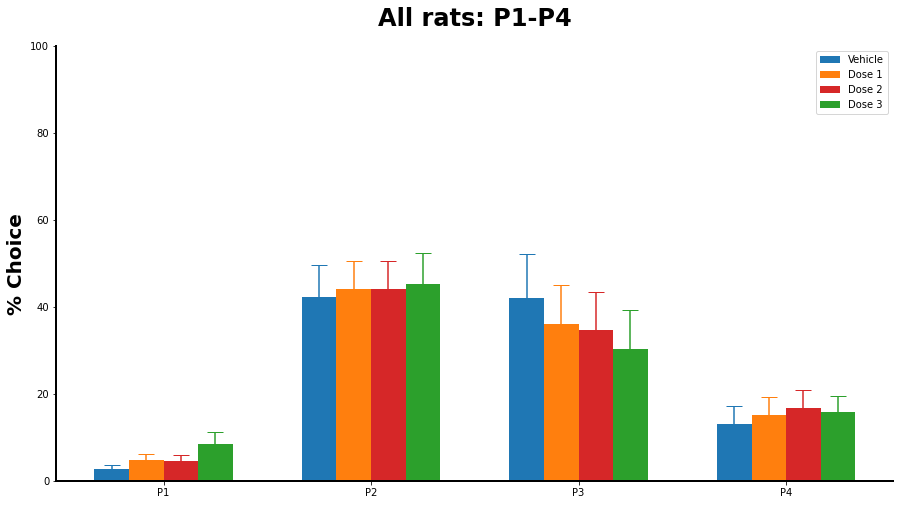

In [14]:
rgt.ls_bar_plot('All rats',mean_scores,SEM)

## Line plot of other variables


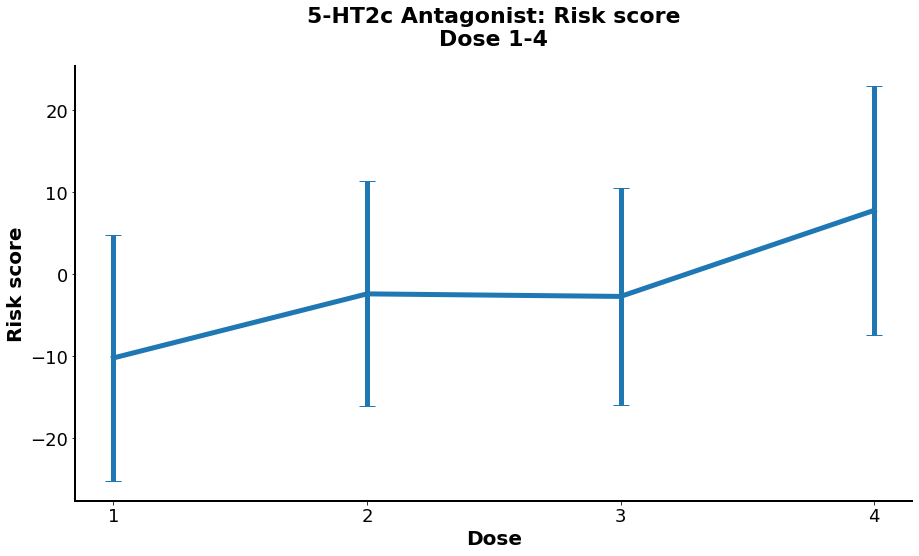

In [15]:
rgt.rgt_plot('risk',startdose,enddose,title,mean_scores,SEM,y_label = 'Risk score', x_label = 'Dose')

## Plotting by risk status

In [ ]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

In [ ]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, y_label = 'Risk score') 

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')